In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/square/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().rectanglegrid(ar=1)

X.shape =  (10201, 2)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2550 points processed...
A_k, Atilde_k: 5100 points processed...
A_k, Atilde_k: 7650 points processed...
A_k, Atilde_k: 10200 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2550 points processed...
local_param: 5100 points processed...
local_param: 7650 points processed...
local_param: 10200 points processed...
local_param: all 10201 points processed...
After iter 1, max distortion is 10.193678
After iter 2, max distortion is 8.033178
After iter 3, max distortion is 8.033178
After iter 4, max distortion is 8.033178
After iter 5, max distortion is 8.033178
After iter 6, max distortion is 8.033178
After iter 7, max distortion is 8.033178
After iter 8, max distortion is 8.033178
Max local distortion = 8.033177796736354
###############
Took 66.6 seconds to perform step 1: construct low distoriton local views
############

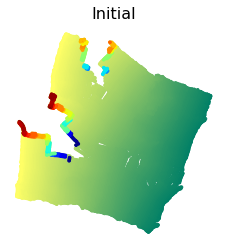

###############
Took 8.0 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.00043563659445154267


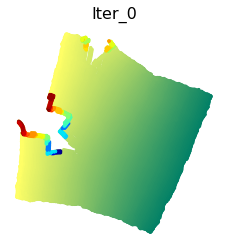

Iteration: 1
error: 0.00043283936029545425
Iteration: 2
error: 0.0004184971430427911
Iteration: 3
error: 0.00041442281882136527
Iteration: 4
error: 0.0004131583932744866
Iteration: 5
error: 0.00041925746540328484


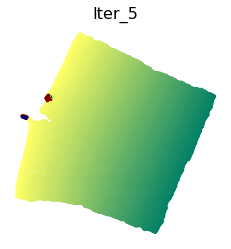

Iteration: 6
error: 0.00042607276109831593
Iteration: 7
error: 0.0004225800592022754
Iteration: 8
error: 0.0004179817202203774
Iteration: 9
error: 0.00041442449775083614
Iteration: 10
error: 0.0004114049915298285


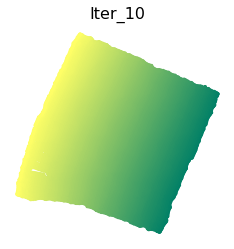

Iteration: 11
error: 0.0004087118812581223
Iteration: 12
error: 0.00040627461592926433
Iteration: 13
error: 0.00040386639139173994
Iteration: 14
error: 0.0004017979493744853
Iteration: 15
error: 0.0003997308717458522


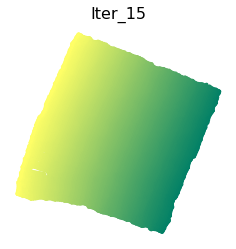

Iteration: 16
error: 0.000397855297966222
Iteration: 17
error: 0.0003959818127352802
Iteration: 18
error: 0.00039430139818734405
Iteration: 19
error: 0.0003926702873578769


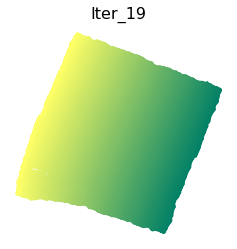

###############
Took 314.3 seconds to refine global embedding.
###############
###############
Took 324.2 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=12, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

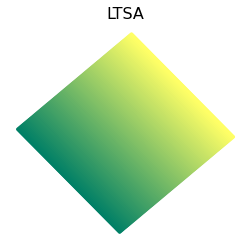

In [11]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=25, min_dist=0.25, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

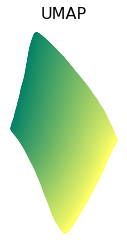

In [15]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

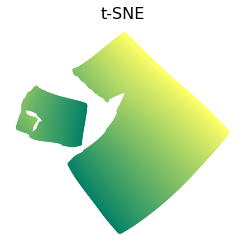

In [19]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')